# 1. Importing Libraries & Data
In this section, we set up the foundation for our project by importing the necessary Python libraries and loading the dataset. These libraries provide the tools for data manipulation, visualization, and machine learning modeling throughout the notebook. Additionally, we import the historical claims dataset, which forms the core of our analysis. 

In [27]:
import pandas as pd

# Train-Test Split
from sklearn.model_selection import train_test_split

import preproc as p

pd.set_option('display.max_columns', None)
# Suppress Warnings
import warnings
warnings.filterwarnings("ignore")

**Import Data**

In [28]:
# Load training data
df = pd.read_csv('./project_data/train_data_EDA.csv', index_col = 'Claim Identifier')

# Load testing data
test = pd.read_csv('./project_data/test_data_EDA.csv', index_col = 'Claim Identifier')

# Display the first 3 rows of the training data
df.head(3)

,Age at Injury,Average Weekly Wage,Birth Year,Claim Injury Type,IME-4 Count,Industry Code,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Number of Dependents,Alternative Dispute Resolution Bin,Attorney/Representative Bin,Carrier Name Enc,Carrier Type freq,Carrier Type_1A. PRIVATE,Carrier Type_2A. SIF,Carrier Type_3A. SELF PUBLIC,Carrier Type_4A. SELF PRIVATE,Carrier Type_5. SPECIAL FUND,County of Injury freq,COVID-19 Indicator Enc,District Name freq,Gender Enc,Gender_F,Gender_M,Medical Fee Region freq,Accident Date Year,Accident Date Month,Accident Date Day,Accident Date Day of Week,Assembly Date Year,Assembly Date Month,Assembly Date Day,Assembly Date Day of Week,C-2 Date Year,C-2 Date Month,C-2 Date Day,C-2 Date Day of Week,WCIO Codes,Zip Code Valid,Industry Sector Count Enc,Age Group,C-3 Date Binary,First Hearing Date Binary
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,31.0,0.00,1988.0,1,0.0,44.0,27,10,62,1.0,0,0,238,285367,1,0,0,0,0,3355,0,44646,0,0,1,135885,2019,12,30,0.0,2020,1,1,2,2019,12,31,1.0,271062,0,103330,1,0,0
5393091,46.0,1745.93,1973.0,3,4.0,23.0,97,49,38,4.0,0,1,1217,285367,1,0,0,0,0,760,0,40449,1,1,0,135885,2019,8,30,4.0,2020,1,1,2,2020,1,1,2.0,974938,0,69053,1,1,1
5393889,40.0,1434.80,1979.0,3,0.0,56.0,79,7,10,6.0,0,0,435,285367,1,0,0,0,0,17450,0,86171,0,0,1,85033,2019,12,6,4.0,2020,1,1,2,2020,1,1,2.0,79710,0,57495,1,0,0


# 2. Train-Test Split
The train-test split is a crucial technique used to assess model performance by dividing the dataset into training and testing subsets. This ensures that the model is evaluated on unseen data, helping to prevent overfitting and providing an unbiased performance estimate. 

<a href="#top">Top &#129033;</a>

**Holdout Method**

In [29]:
# Split the DataFrame into features (X) and target variable (y)
X = df.drop('Claim Injury Type', axis=1) 
y = df['Claim Injury Type']  

In [30]:
# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify = y) 


# 3. Missing Values

In [31]:
X_train.isna().sum()

Age at Injury                             0
Average Weekly Wage                   22968
Birth Year                            23204
IME-4 Count                               0
Industry Code                             0
WCIO Cause of Injury Code                 0
WCIO Nature of Injury Code                0
WCIO Part Of Body Code                    0
Number of Dependents                      0
Alternative Dispute Resolution Bin        0
Attorney/Representative Bin               0
Carrier Name Enc                          0
Carrier Type freq                         0
Carrier Type_1A. PRIVATE                  0
Carrier Type_2A. SIF                      0
Carrier Type_3A. SELF PUBLIC              0
Carrier Type_4A. SELF PRIVATE             0
Carrier Type_5. SPECIAL FUND              0
County of Injury freq                     0
COVID-19 Indicator Enc                    0
District Name freq                        0
Gender Enc                                0
Gender_F                        

**Birth Year**

To fill the missing values, we will start by creating a mask, which filters for observations where **Age at Injury** and **Accident Date Year** are not missing, and when **Birth Year** is either missing or zero. Since we are going to use **Age at Injury** and **Accident Date Year** to compute **Birth Year**, ensuring those two variables are no missing is crucial. Then, we also decided to recompute the **Birth Year** where it is 0, since it is impossible to have 0 as a **Birth Year**.

In [32]:
train_mask = X_train['Accident Date Year'].notna() & X_train['Age at Injury'].notna() & \
           (X_train['Birth Year'].isna() | (X_train['Birth Year'] == 0))


val_mask = (X_val['Accident Date Year'].notna() &  X_val['Age at Injury'].notna() &  
    (X_val['Birth Year'].isna() | (X_val['Birth Year'] == 0)))

test_mask = test['Accident Date Year'].notna() & test['Age at Injury'].notna() & \
           (test['Birth Year'].isna() | (test['Birth Year'] == 0))

In [33]:
X_train.loc[train_mask, 'Birth Year'] = X_train['Accident Date Year'] - X_train['Age at Injury']

X_val.loc[val_mask, 'Birth Year'] = X_val['Accident Date Year'] - X_val['Age at Injury']

test.loc[test_mask, 'Birth Year'] = test['Accident Date Year'] - test['Age at Injury']

**Average Weekly Wage**

In [37]:
X_train['Average Weekly Wage'] = p.ball_tree_impute(X_train, 'Average Weekly Wage', n_neighbors=100)

X_val['Average Weekly Wage'] = p.ball_tree_impute(X_val, 'Average Weekly Wage', n_neighbors=100)

test['Average Weekly Wage'] = p.ball_tree_impute(test, 'Average Weekly Wage', n_neighbors=100)

# 3. Outliers

In [38]:
X_train.describe()

,Age at Injury,Average Weekly Wage,Birth Year,IME-4 Count,Industry Code,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Number of Dependents,Alternative Dispute Resolution Bin,Attorney/Representative Bin,Carrier Name Enc,Carrier Type freq,Carrier Type_1A. PRIVATE,Carrier Type_2A. SIF,Carrier Type_3A. SELF PUBLIC,Carrier Type_4A. SELF PRIVATE,Carrier Type_5. SPECIAL FUND,County of Injury freq,COVID-19 Indicator Enc,District Name freq,Gender Enc,Gender_F,Gender_M,Medical Fee Region freq,Accident Date Year,Accident Date Month,Accident Date Day,Accident Date Day of Week,Assembly Date Year,Assembly Date Month,Assembly Date Day,Assembly Date Day of Week,C-2 Date Year,C-2 Date Month,C-2 Date Day,C-2 Date Day of Week,WCIO Codes,Zip Code Valid,Industry Sector Count Enc,Age Group,C-3 Date Binary,First Hearing Date Binary
count,459220.000000,4.592200e+05,459220.000000,459220.000000,459220.000000,459220.000000,459220.000000,459220.000000,459220.000000,459220.000000,459220.000000,459220.000000,459220.000000,459220.000000,459220.000000,459220.000000,459220.000000,459220.000000,459220.000000,459220.000000,459220.000000,459220.000000,459220.000000,459220.000000,459220.000000,459220.000000,459220.000000,459220.000000,459220.000000,459220.000000,459220.000000,459220.000000,459220.000000,459220.000000,459220.000000,459220.000000,459220.000000,459220.000000,459220.000000,459220.000000,459220.000000,459220.000000,459220.000000
mean,42.111306,4.957012e+02,1977.977381,0.742178,57.624263,52.915609,39.930595,39.908336,3.003952,0.004514,0.316735,801.014518,194219.628039,0.497548,0.193546,0.212179,0.091843,0.001818,31537.881329,0.048116,157918.966476,0.424028,0.407587,0.584193,174935.747326,2020.829134,6.497461,15.504174,2.505381,2021.052149,6.488931,15.640595,2.008225,2021.043783,6.491597,15.668194,2.192596,483636.517739,-0.023109,157239.697025,1.030282,0.325833,0.262556
std,14.264959,6.608462e+03,14.065084,1.924955,20.920515,27.006646,22.892690,20.691505,2.000465,0.067036,0.465204,440.286238,92719.915918,0.499995,0.395077,0.408852,0.288804,0.042603,20911.261385,0.214012,107817.134849,0.510558,0.491386,0.492861,89153.870894,1.850788,3.455034,8.758432,1.807271,0.810464,3.443113,8.732508,1.437664,1.065166,3.403197,8.599084,1.483059,295755.796722,0.275602,96545.334439,0.236582,0.468686,0.440024
min,0.000000,0.000000e+00,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1032.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.000000,0.000000,3976.000000,0.000000,0.000000,0.000000,33472.000000,1961.000000,1.000000,1.000000,0.000000,2020.000000,1.000000,1.000000,0.000000,1996.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,2980.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000e+00,1967.000000,0.000000,44.000000,29.000000,10.000000,32.000000,1.000000,0.000000,0.000000,428.000000,111144.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11530.000000,0.000000,45605.000000,0.000000,0.000000,0.000000,85033.000000,2020.000000,3.000000,8.000000,1.000000,2020.000000,3.000000,8.000000,1.000000,2020.000000,3.000000,8.000000,1.000000,252838.000000,0.000000,69053.000000,1.000000,0.000000,0.000000
50%,42.000000,0.000000e+00,1978.000000,0.000000,61.000000,56.000000,49.000000,38.000000,3.000000,0.000000,0.000000,988.000000,121920.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30014.000000,0.000000,86171.000000,0.000000,0.000000,1.000000,135885.000000,2021.000000,7.000000,15.000000,2.000000,2021.000000,7.000000,15.000000,2.000000,2021.000000,7.000000,16.000000,2.000000,563738.000000,0.000000,103330.000000,1.000000,0.000000,0.000000
75%,54.000000,8.170000e+02,1990.000000,0.000000,62.000000,75.000000,52.000000,53.000000,5.000000,0.000000,1.000000,1067.000000,285367.000000,1.000000,0.000000,0.000000,0.000000,0.000000,53207.000000,0.000000,270778.000000,1.000000,1.000000,1.000000,265981.000000,2022.000000,9.000000,23.000000,4.000000,2022.000000,9.000000,23.000000,3.000000,2022.000000,9.

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def detect_outliers_iqr(df, missing_threshold):
    missing_col = []
    outliers_indices = set()
    
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outlier_data = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers_indices.update(outlier_data.index)
        
        missing = len(outlier_data) / len(df) * 100
        
        # Print the number of outliers
        print(f'Column: {column} - Number of Outliers: {len(outlier_data)}')
        print(f'Column: {column} - % of Outliers: {missing:.2f}% \n')
        
        if missing > missing_threshold:
            missing_col.append(column)
        
        # Boxplot for each column
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=df, x=column, color='skyblue', showfliers=False)  # Base boxplot without showing outliers
        sns.stripplot(
            data=outlier_data, 
            x=column, 
            color='red', 
            jitter=True, 
            label='Outliers'
        )
        plt.title(f'Boxplot with Outliers for {column}')
        plt.legend()
        plt.show()
    
    print(f'Columns with more than {missing_threshold}% Outliers:')        
    print(missing_col)


Column: Age at Injury - Number of Outliers: 165
Column: Age at Injury - % of Outliers: 0.04% 



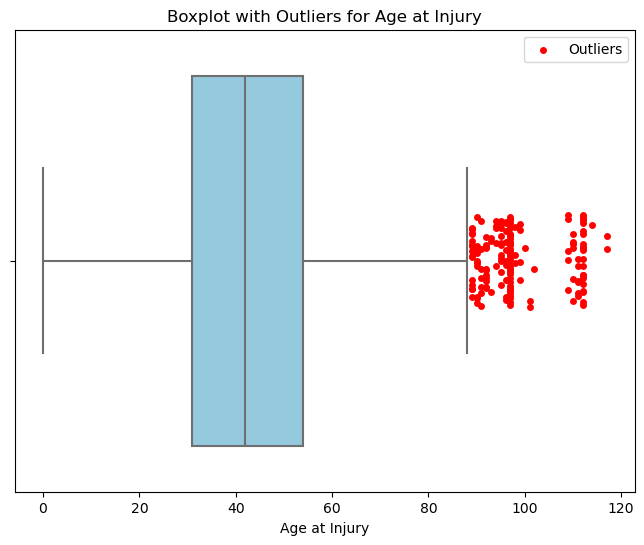

Column: Average Weekly Wage - Number of Outliers: 19655
Column: Average Weekly Wage - % of Outliers: 4.28% 



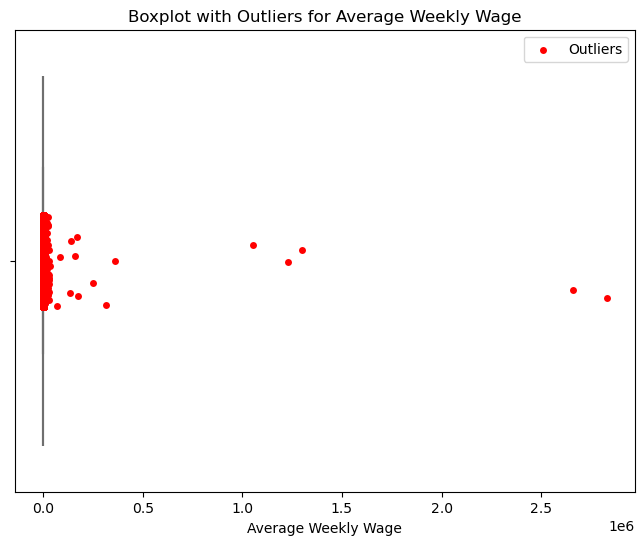

Column: Birth Year - Number of Outliers: 280
Column: Birth Year - % of Outliers: 0.06% 



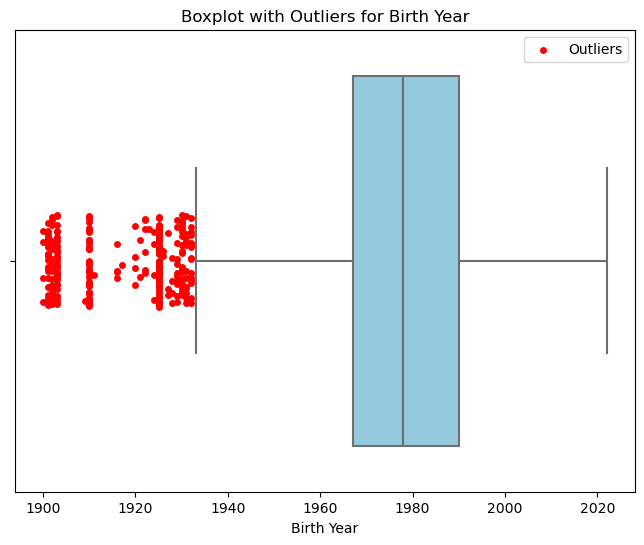

Column: IME-4 Count - Number of Outliers: 106210
Column: IME-4 Count - % of Outliers: 23.13% 



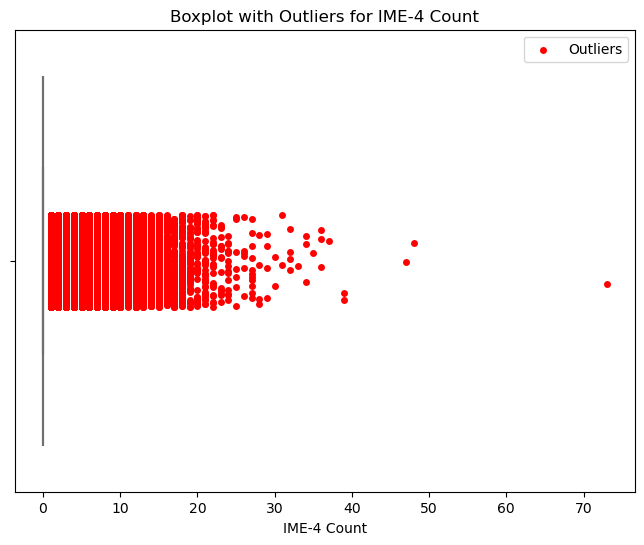

Column: Industry Code - Number of Outliers: 83608
Column: Industry Code - % of Outliers: 18.21% 



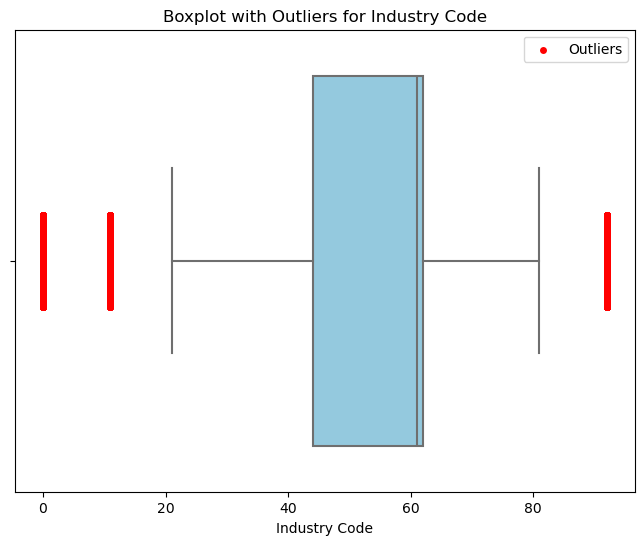

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Column: WCIO Cause of Injury Code - Number of Outliers: 0
Column: WCIO Cause of Injury Code - % of Outliers: 0.00% 



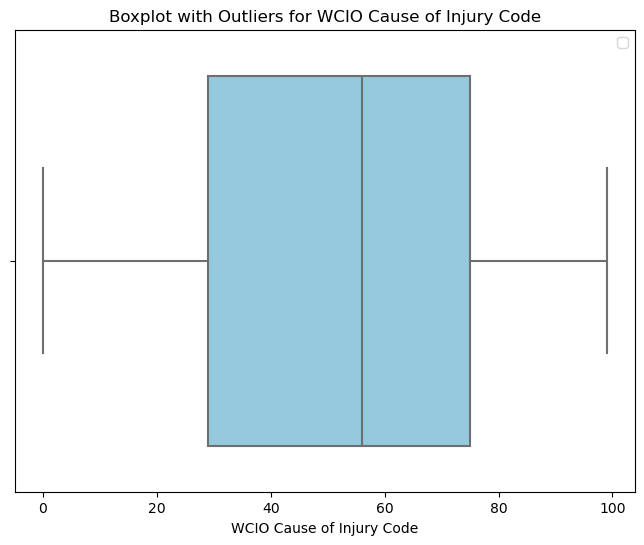

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Column: WCIO Nature of Injury Code - Number of Outliers: 0
Column: WCIO Nature of Injury Code - % of Outliers: 0.00% 



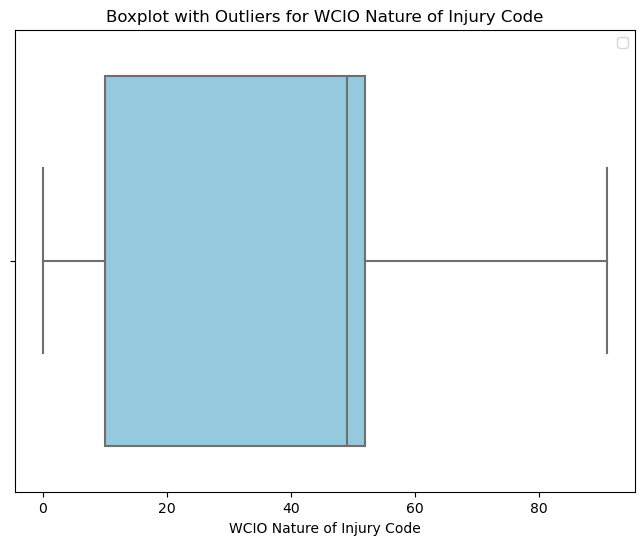

Column: WCIO Part Of Body Code - Number of Outliers: 41536
Column: WCIO Part Of Body Code - % of Outliers: 9.04% 



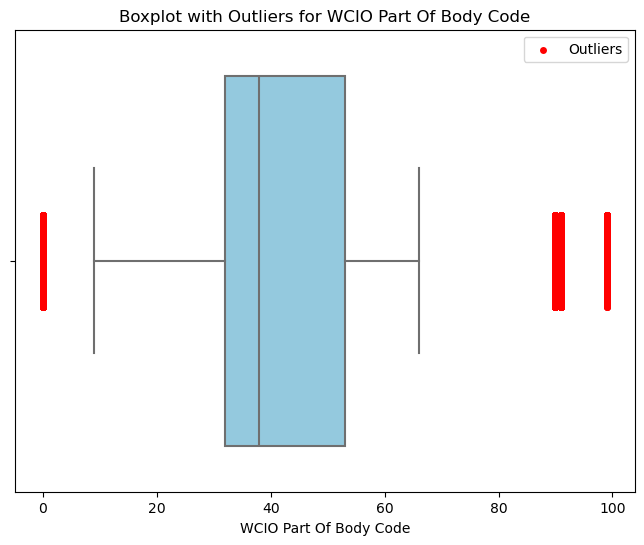

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Column: Number of Dependents - Number of Outliers: 0
Column: Number of Dependents - % of Outliers: 0.00% 



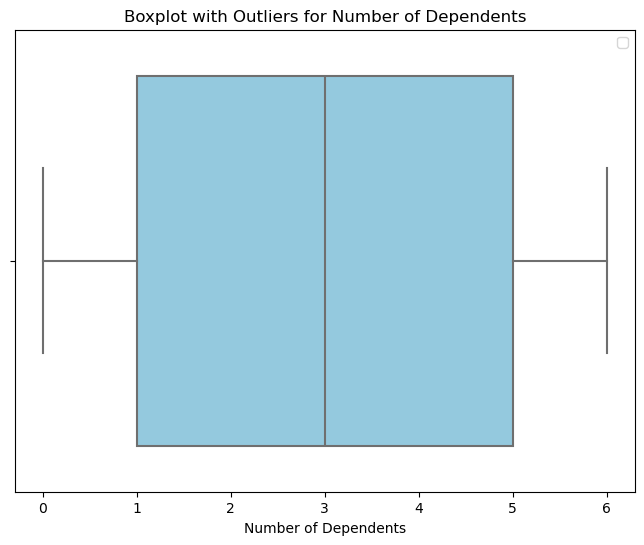

Column: Alternative Dispute Resolution Bin - Number of Outliers: 2073
Column: Alternative Dispute Resolution Bin - % of Outliers: 0.45% 



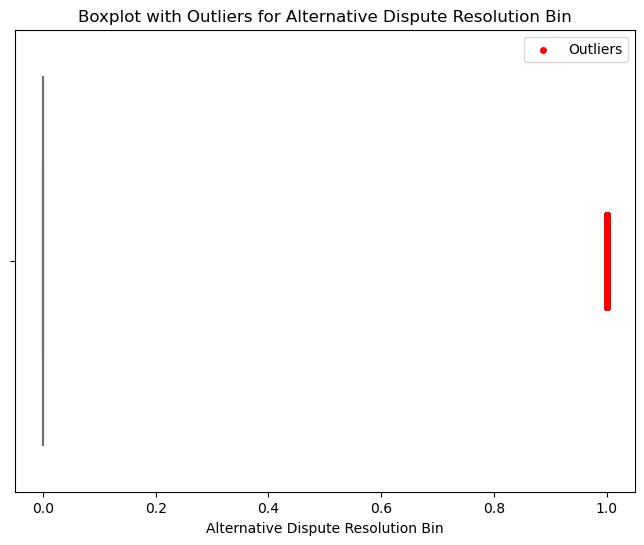

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Column: Attorney/Representative Bin - Number of Outliers: 0
Column: Attorney/Representative Bin - % of Outliers: 0.00% 



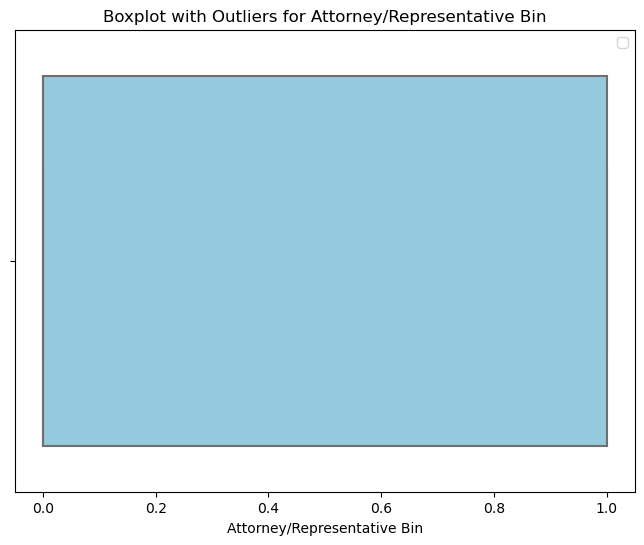

Column: Carrier Name Enc - Number of Outliers: 0
Column: Carrier Name Enc - % of Outliers: 0.00% 



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


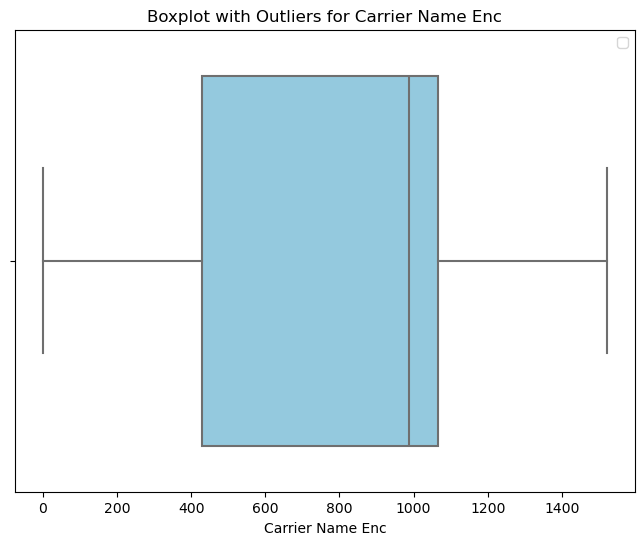

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Column: Carrier Type freq - Number of Outliers: 0
Column: Carrier Type freq - % of Outliers: 0.00% 



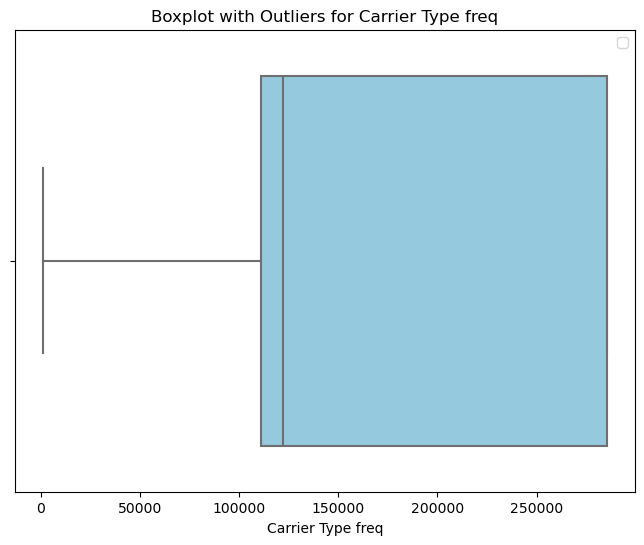

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Column: Carrier Type_1A. PRIVATE - Number of Outliers: 0
Column: Carrier Type_1A. PRIVATE - % of Outliers: 0.00% 



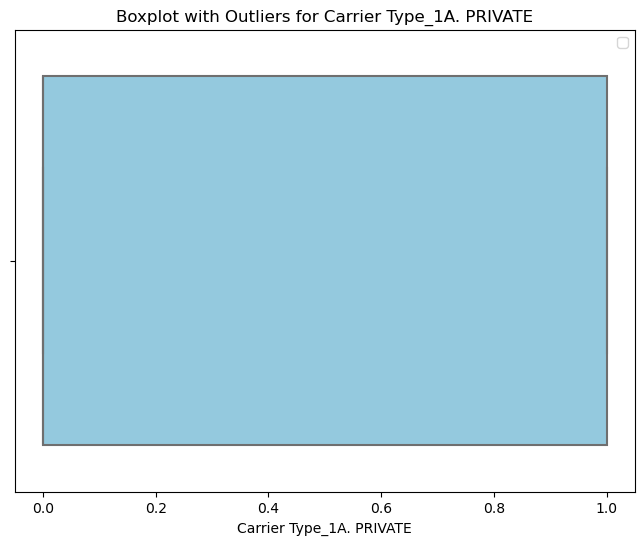

Column: Carrier Type_2A. SIF - Number of Outliers: 88880
Column: Carrier Type_2A. SIF - % of Outliers: 19.35% 



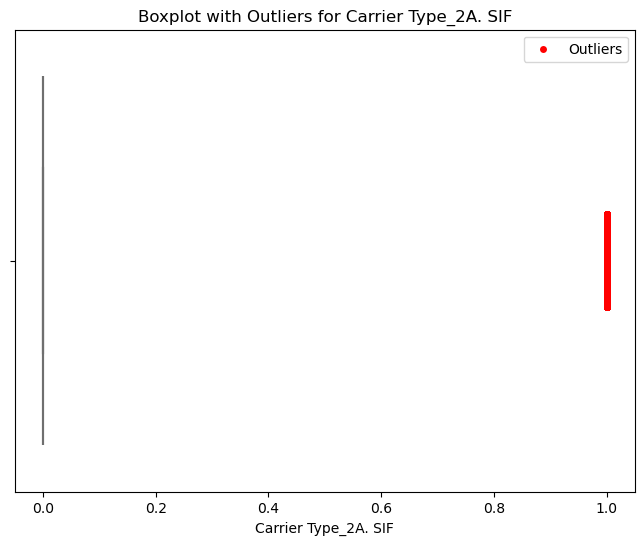

Column: Carrier Type_3A. SELF PUBLIC - Number of Outliers: 97437
Column: Carrier Type_3A. SELF PUBLIC - % of Outliers: 21.22% 



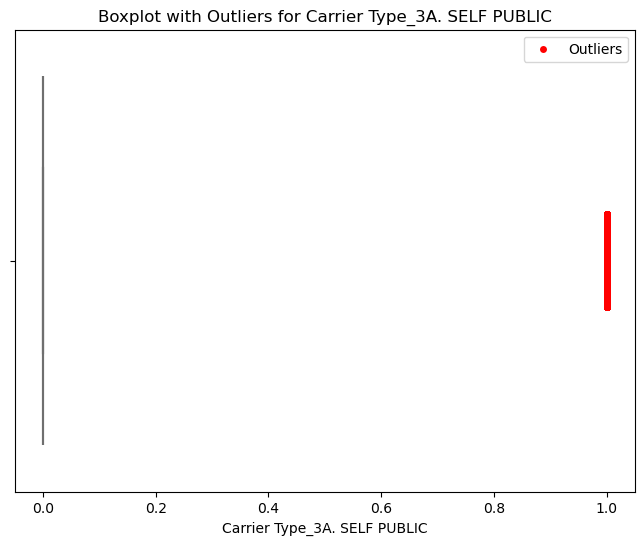

Column: Carrier Type_4A. SELF PRIVATE - Number of Outliers: 42176
Column: Carrier Type_4A. SELF PRIVATE - % of Outliers: 9.18% 



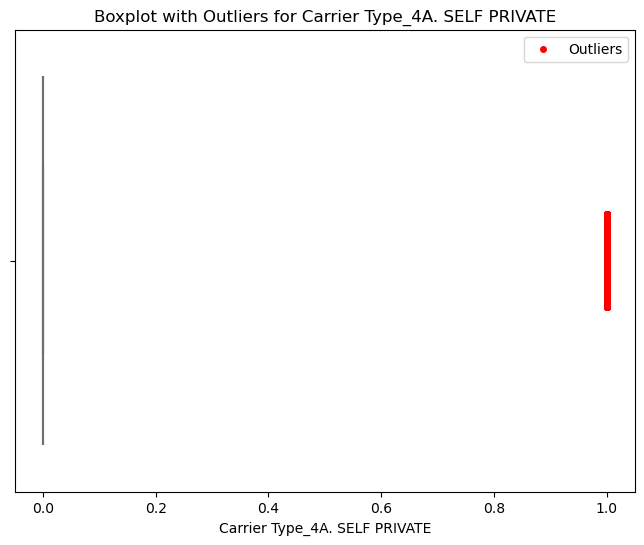

Column: Carrier Type_5. SPECIAL FUND - Number of Outliers: 835
Column: Carrier Type_5. SPECIAL FUND - % of Outliers: 0.18% 



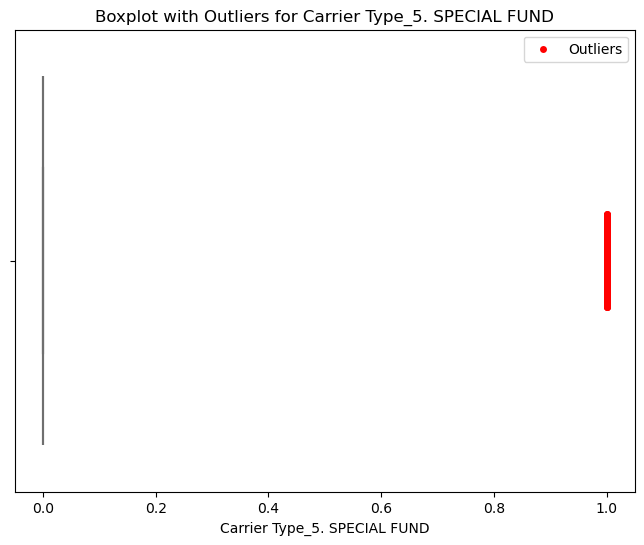

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Column: County of Injury freq - Number of Outliers: 0
Column: County of Injury freq - % of Outliers: 0.00% 



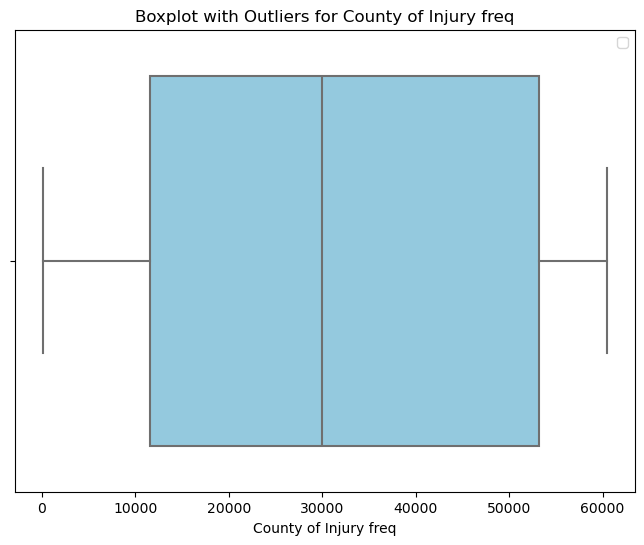

Column: COVID-19 Indicator Enc - Number of Outliers: 22096
Column: COVID-19 Indicator Enc - % of Outliers: 4.81% 



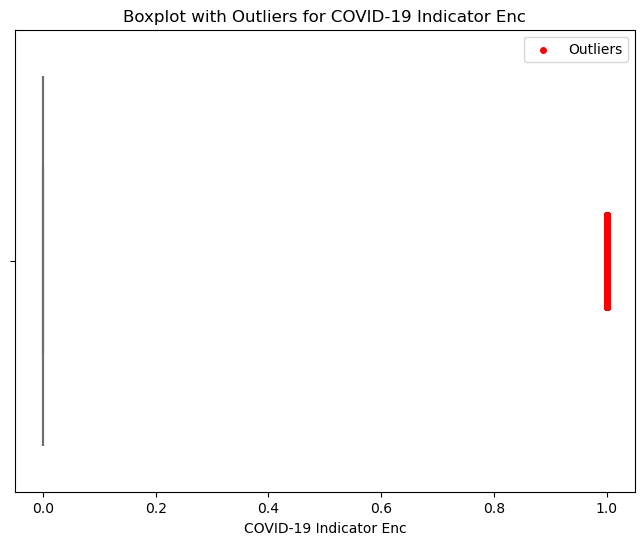

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Column: District Name freq - Number of Outliers: 0
Column: District Name freq - % of Outliers: 0.00% 



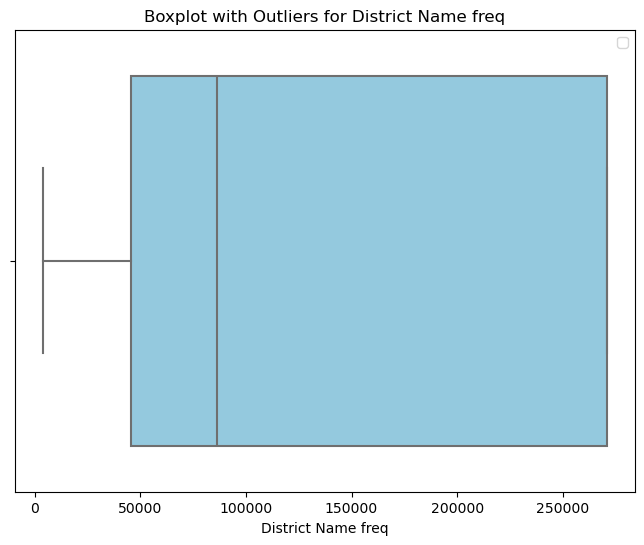

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Column: Gender Enc - Number of Outliers: 0
Column: Gender Enc - % of Outliers: 0.00% 



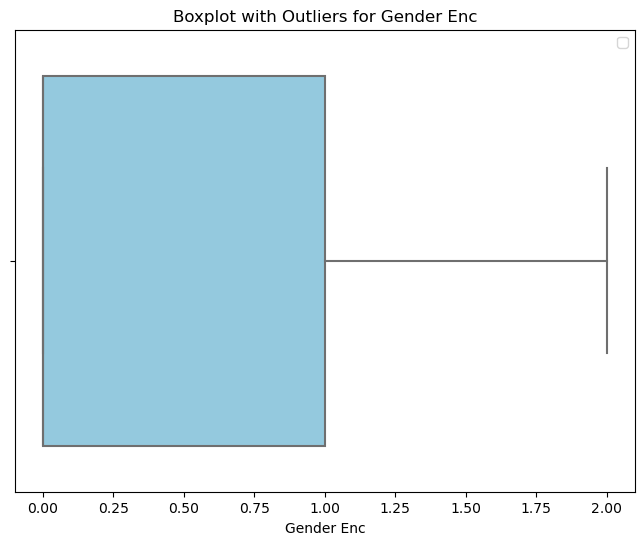

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Column: Gender_F - Number of Outliers: 0
Column: Gender_F - % of Outliers: 0.00% 



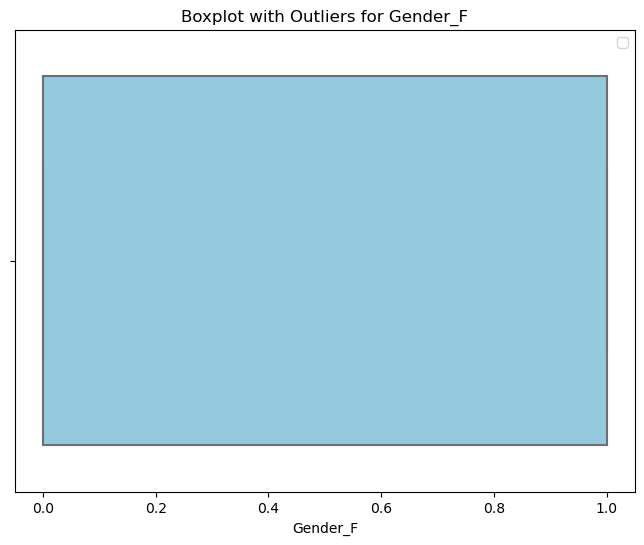

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Column: Gender_M - Number of Outliers: 0
Column: Gender_M - % of Outliers: 0.00% 



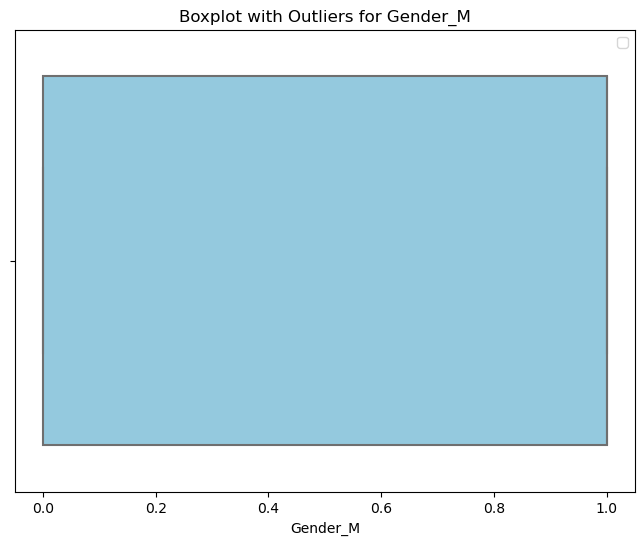

Column: Medical Fee Region freq - Number of Outliers: 0
Column: Medical Fee Region freq - % of Outliers: 0.00% 



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


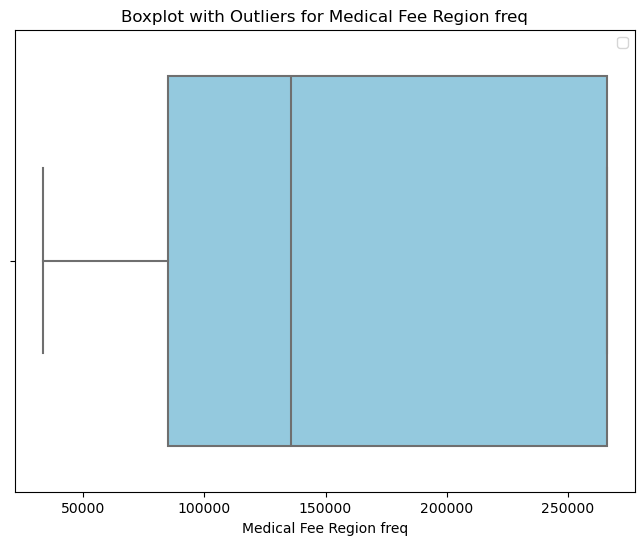

Column: Accident Date Year - Number of Outliers: 3898
Column: Accident Date Year - % of Outliers: 0.85% 



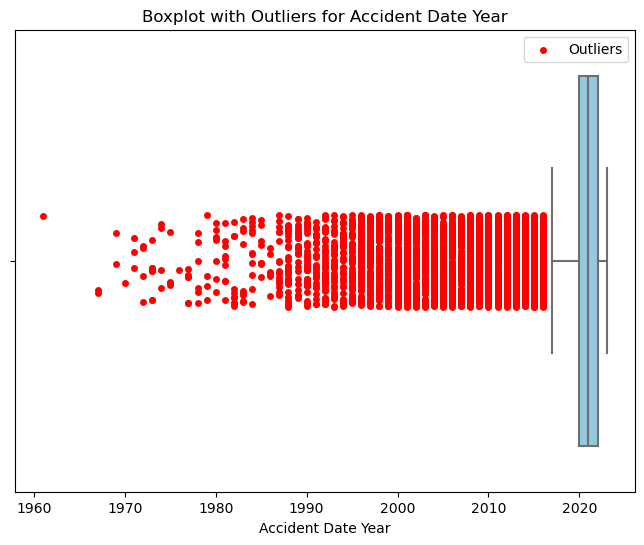

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Column: Accident Date Month - Number of Outliers: 0
Column: Accident Date Month - % of Outliers: 0.00% 



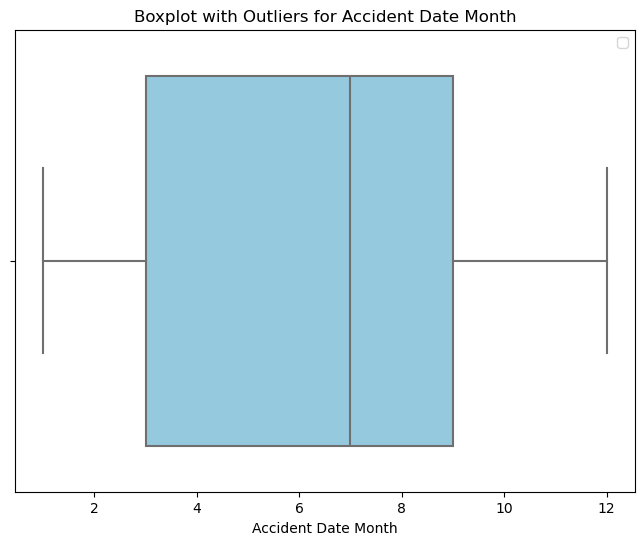

Column: Accident Date Day - Number of Outliers: 0
Column: Accident Date Day - % of Outliers: 0.00% 



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


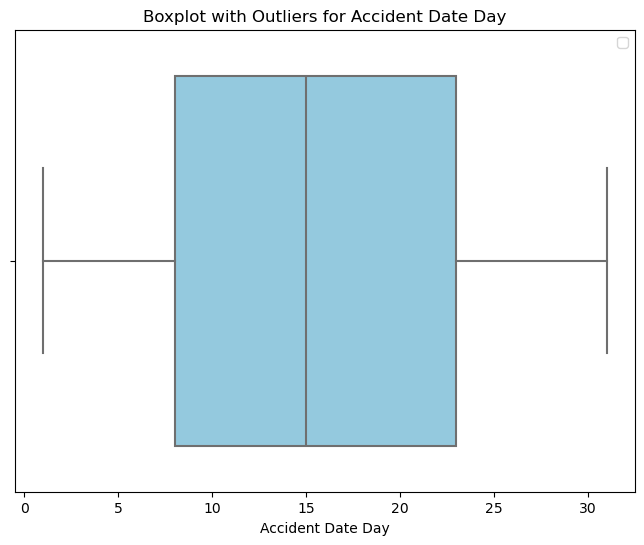

Column: Accident Date Day of Week - Number of Outliers: 0
Column: Accident Date Day of Week - % of Outliers: 0.00% 



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


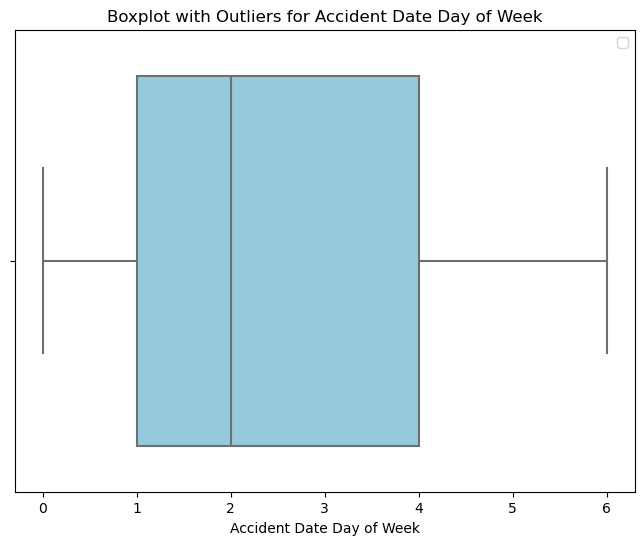

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Column: Assembly Date Year - Number of Outliers: 0
Column: Assembly Date Year - % of Outliers: 0.00% 



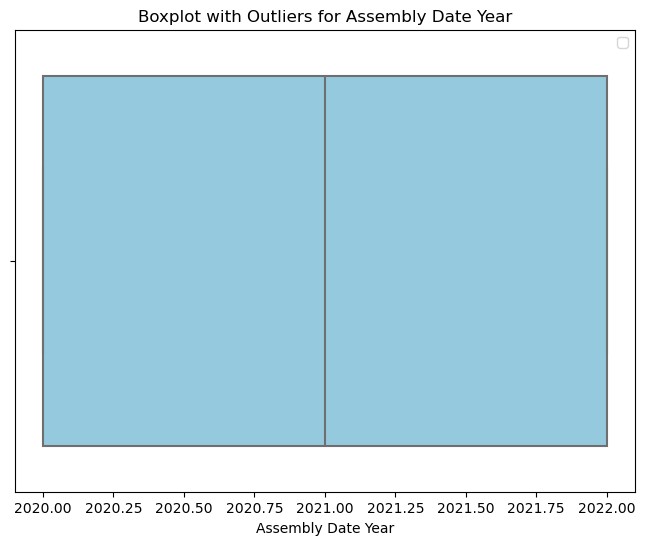

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Column: Assembly Date Month - Number of Outliers: 0
Column: Assembly Date Month - % of Outliers: 0.00% 



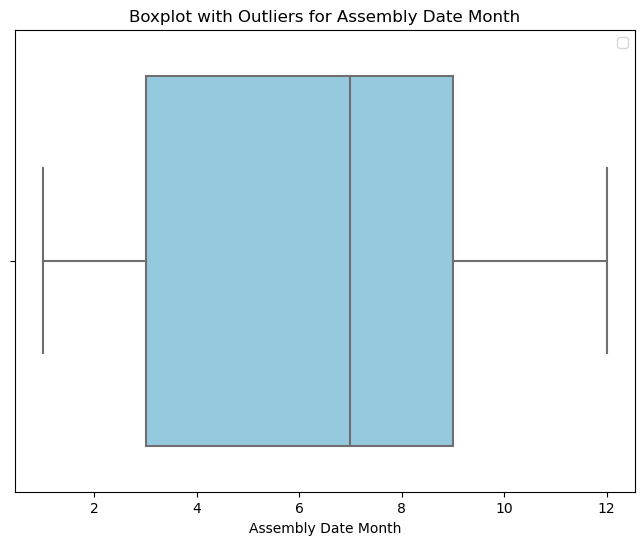

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Column: Assembly Date Day - Number of Outliers: 0
Column: Assembly Date Day - % of Outliers: 0.00% 



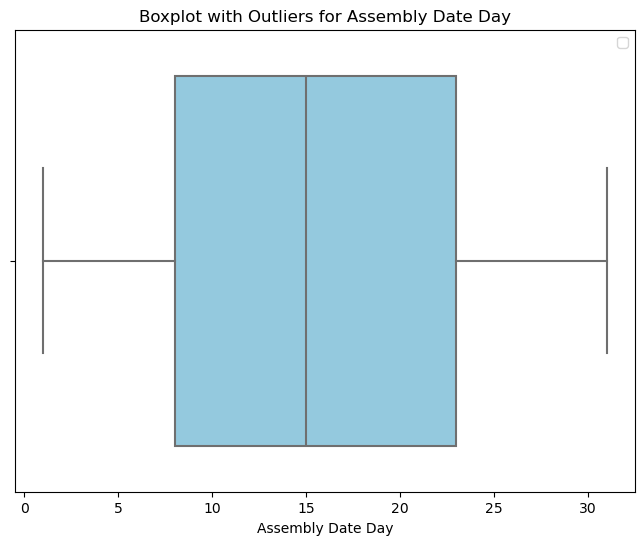

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Column: Assembly Date Day of Week - Number of Outliers: 0
Column: Assembly Date Day of Week - % of Outliers: 0.00% 



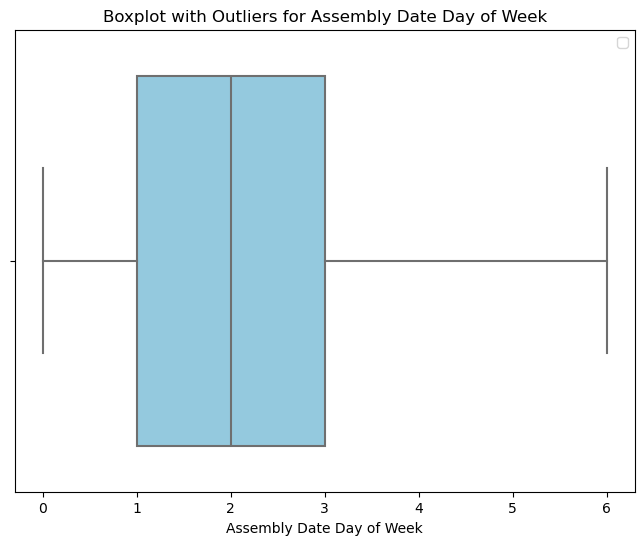

Column: C-2 Date Year - Number of Outliers: 970
Column: C-2 Date Year - % of Outliers: 0.21% 



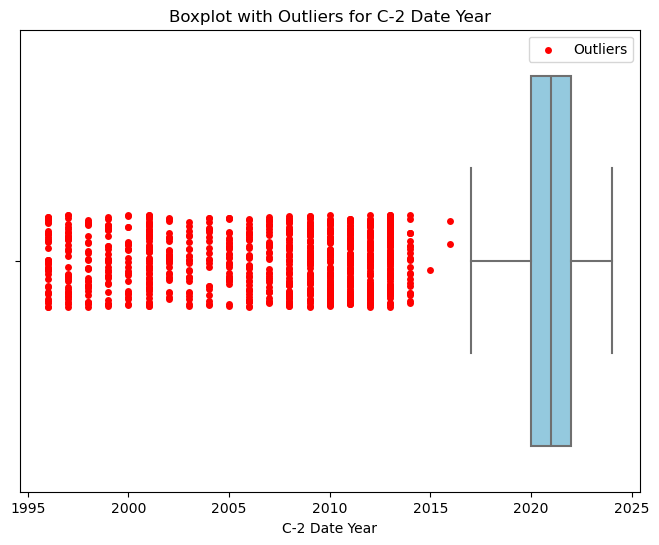

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Column: C-2 Date Month - Number of Outliers: 0
Column: C-2 Date Month - % of Outliers: 0.00% 



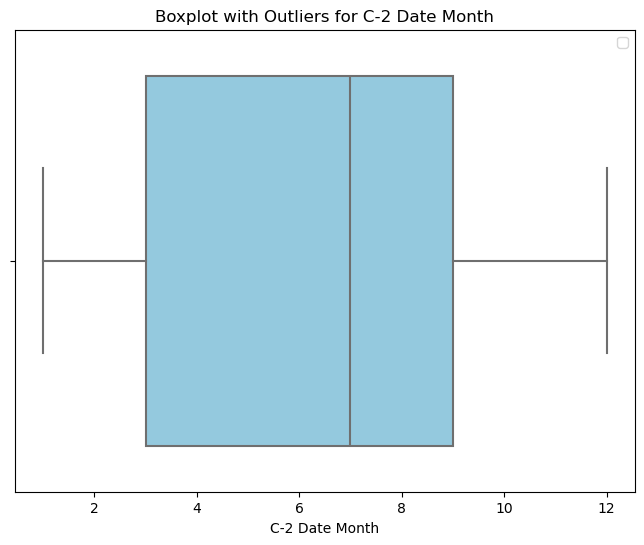

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Column: C-2 Date Day - Number of Outliers: 0
Column: C-2 Date Day - % of Outliers: 0.00% 



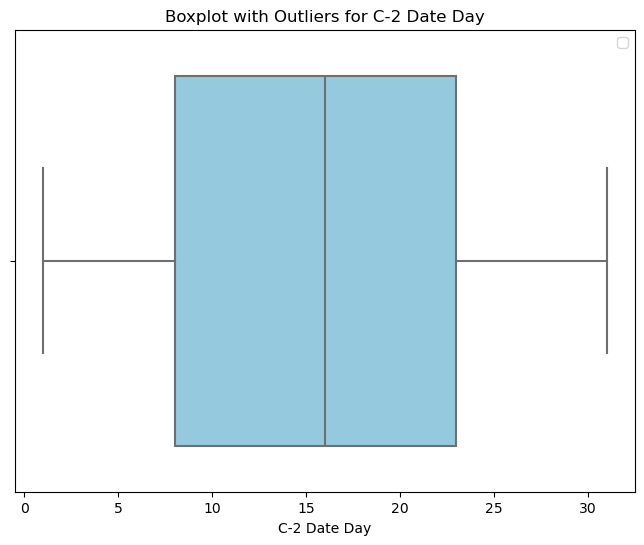

Column: C-2 Date Day of Week - Number of Outliers: 0
Column: C-2 Date Day of Week - % of Outliers: 0.00% 



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


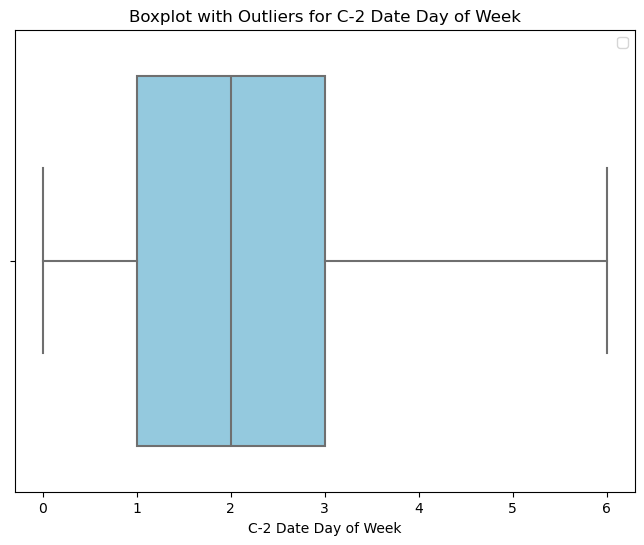

Column: WCIO Codes - Number of Outliers: 0
Column: WCIO Codes - % of Outliers: 0.00% 



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


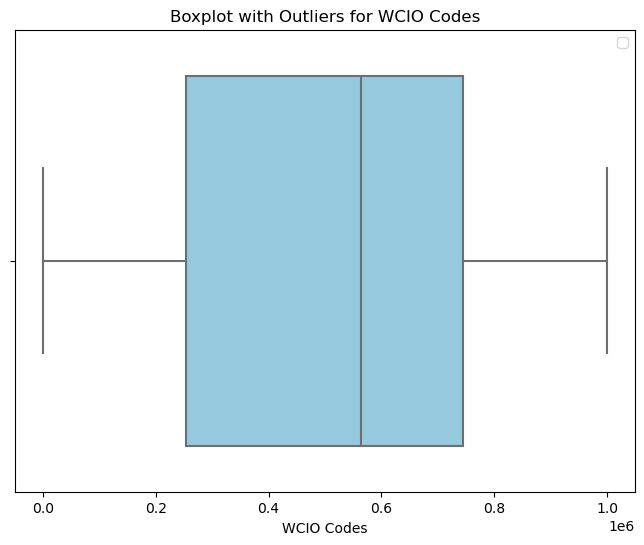

Column: Zip Code Valid - Number of Outliers: 35126
Column: Zip Code Valid - % of Outliers: 7.65% 



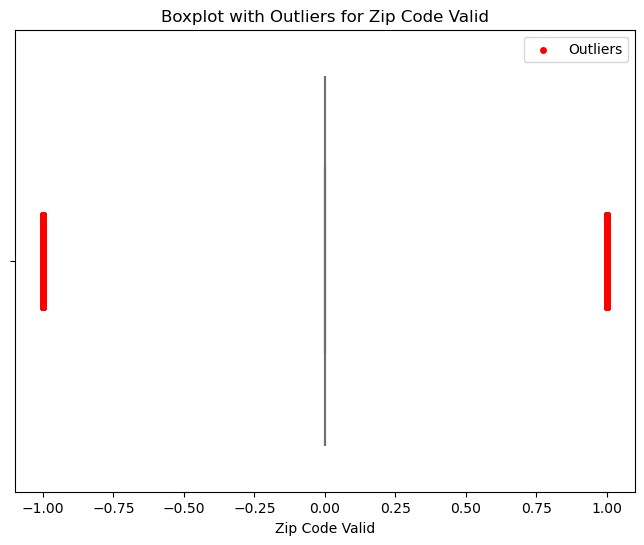

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Column: Industry Sector Count Enc - Number of Outliers: 0
Column: Industry Sector Count Enc - % of Outliers: 0.00% 



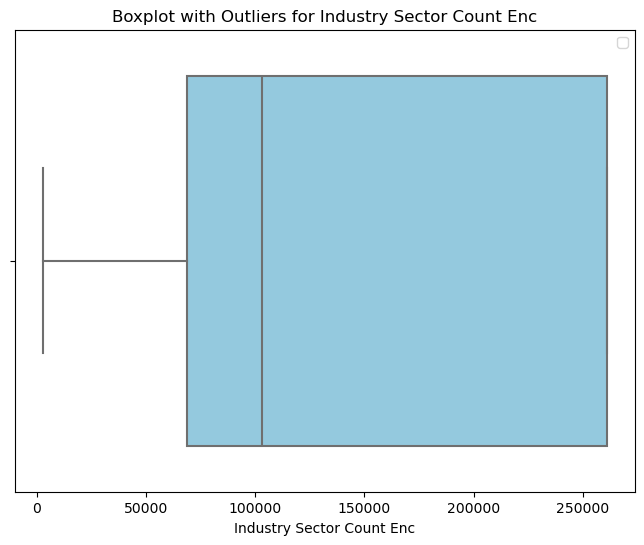

Column: Age Group - Number of Outliers: 26124
Column: Age Group - % of Outliers: 5.69% 



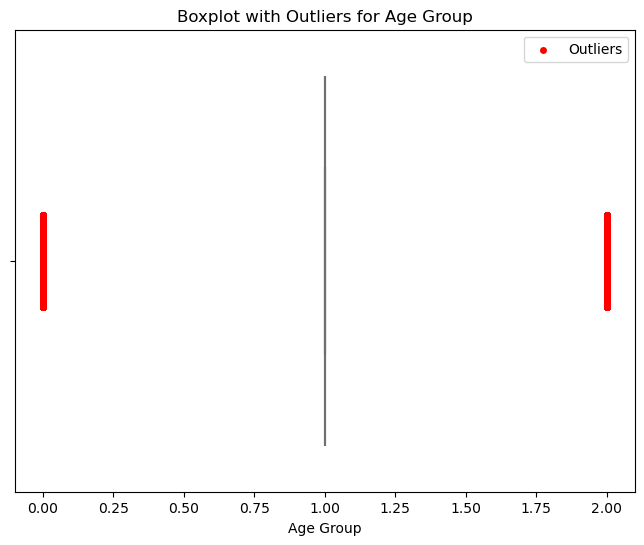

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Column: C-3 Date Binary - Number of Outliers: 0
Column: C-3 Date Binary - % of Outliers: 0.00% 



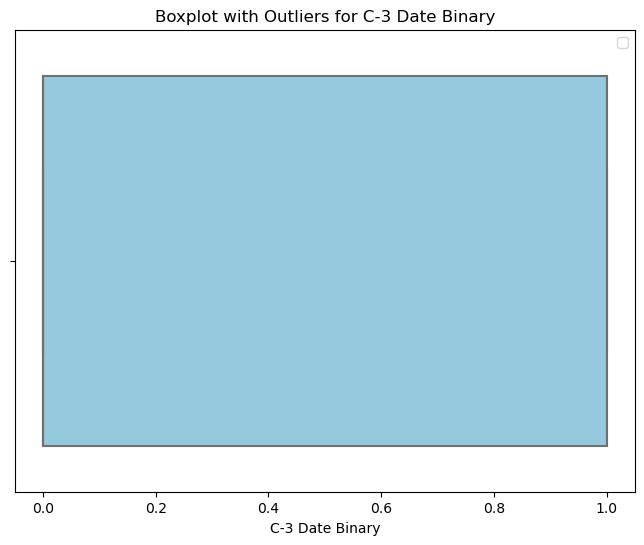

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Column: First Hearing Date Binary - Number of Outliers: 0
Column: First Hearing Date Binary - % of Outliers: 0.00% 



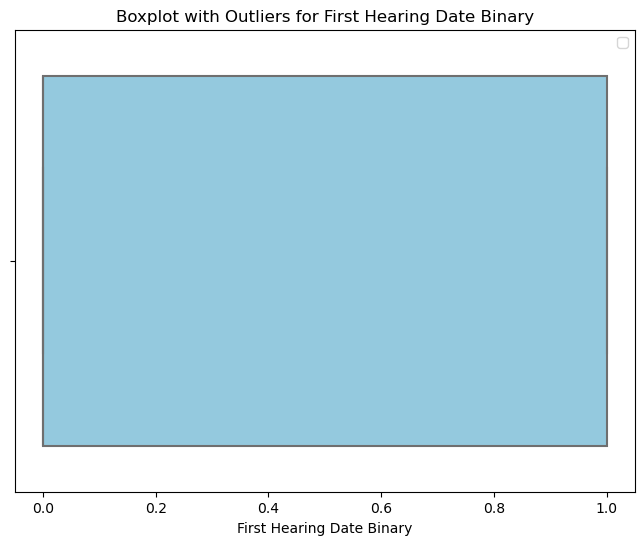

Columns with more than 0.0001% Outliers:
['Age at Injury', 'Average Weekly Wage', 'Birth Year', 'IME-4 Count', 'Industry Code', 'WCIO Part Of Body Code', 'Alternative Dispute Resolution Bin', 'Carrier Type_2A. SIF', 'Carrier Type_3A. SELF PUBLIC', 'Carrier Type_4A. SELF PRIVATE', 'Carrier Type_5. SPECIAL FUND', 'COVID-19 Indicator Enc', 'Accident Date Year', 'C-2 Date Year', 'Zip Code Valid', 'Age Group']


In [41]:
detect_outliers_iqr(X_train, 0.0001)

In [19]:
import numpy as np

X_train['IME-4 Count Log'] = np.log1p(X_train['IME-4 Count'])
X_train['IME-4 Count Double Log'] = np.log1p(X_train['IME-4 Count Log'])

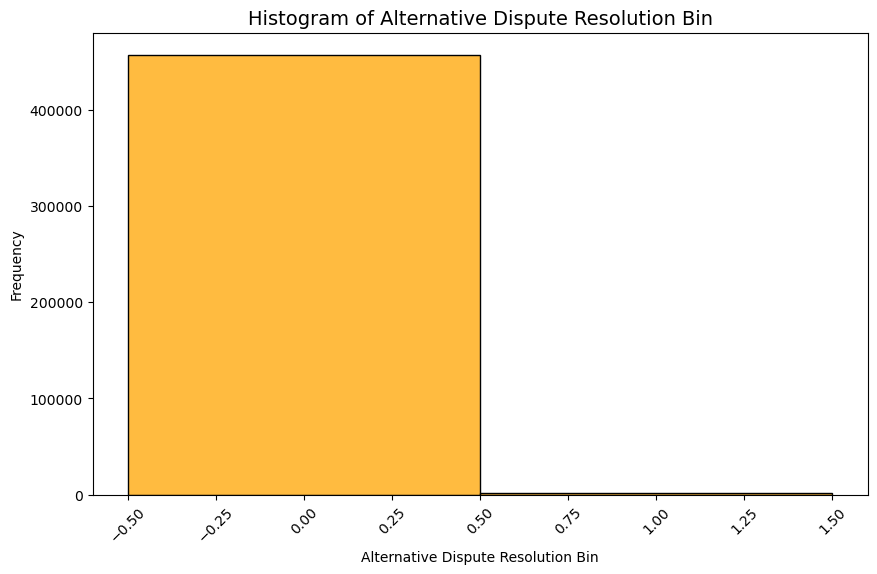

In [42]:
import viz as v

v.plot_histogram(X_train, 'Alternative Dispute Resolution Bin')

In [43]:
X_train['Alternative Dispute Resolution Bin'].value_counts()

Alternative Dispute Resolution Bin
0    457147
1      2073
Name: count, dtype: int64

In [44]:
X_train['COVID-19 Indicator Enc'].value_counts()

COVID-19 Indicator Enc
0    437124
1     22096
Name: count, dtype: int64

In [45]:
X_train['Carrier Type freq'].value_counts()

Carrier Type freq
285367    228484
121920     97437
111144     88880
52788      42176
1774        1408
1032         835
Name: count, dtype: int64

# 4. Feature Selection